# Example Notebook: How to analyse synthetic data
This notebook will show, fairly compact, how to analyse the data that you have someone obtained. 

In [9]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:
from table_evaluator import load_data, TableEvaluator

In [11]:
real, fake = load_data('data/real_test_sample.csv', 'data/fake_test_sample.csv')

In [12]:
real.head()

,trans_id,account_id,trans_amount,balance_after_trans,trans_type,trans_operation,trans_k_symbol,trans_date
0,951892,3245,"3,878.0000","13,680.0000",WITHDRAWAL,REMITTANCE_TO_OTHER_BANK,HOUSEHOLD,2165
1,3547680,515,65.9000,"14,898.6000",CREDIT,UNKNOWN,INTEREST_CREDITED,2006
2,1187131,4066,"32,245.0000","57,995.5000",CREDIT,COLLECTION_FROM_OTHER_BANK,UNKNOWN,2139
3,531421,1811,"3,990.8000","23,324.9000",WITHDRAWAL,REMITTANCE_TO_OTHER_BANK,LOAN_PAYMENT,892
4,37081,119,"12,100.0000","36,580.0000",WITHDRAWAL,WITHDRAWAL_IN_CASH,UNKNOWN,654


In [13]:
fake.head()

,trans_id,account_id,trans_amount,balance_after_trans,trans_type,trans_operation,trans_k_symbol,trans_date
0,911598,3001,"13,619.0000","92,079.0000",CREDIT,COLLECTION_FROM_OTHER_BANK,UNKNOWN,1885
1,377371,1042,"4,174.0000","32,470.0000",WITHDRAWAL,REMITTANCE_TO_OTHER_BANK,HOUSEHOLD,1483
2,970113,3225,274.0000,"57,608.0000",WITHDRAWAL,WITHDRAWAL_IN_CASH,UNKNOWN,1855
3,450090,1489,301.0000,"36,258.0000",CREDIT,CREDIT_IN_CASH,UNKNOWN,885
4,1120409,3634,"6,303.0000","50,975.0000",WITHDRAWAL,REMITTANCE_TO_OTHER_BANK,HOUSEHOLD,1211


In [14]:
cat_cols = ['trans_type', 'trans_operation', 'trans_k_symbol']

In [15]:
evaluator = TableEvaluator(real, fake, cat_cols=cat_cols)

### We can do a numerical analysis

In [20]:
evaluator.evaluate(target_col='trans_type')


Correlation metric: pearsonr


Output()

### But we can also do a visual analysis

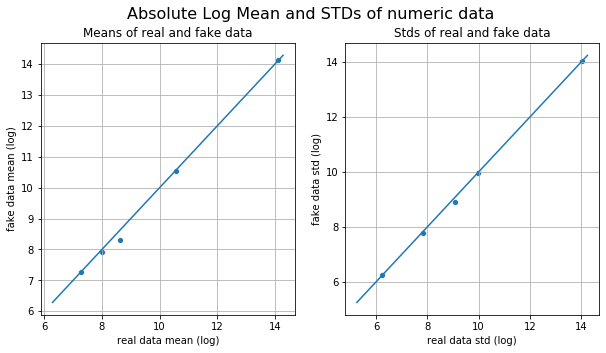

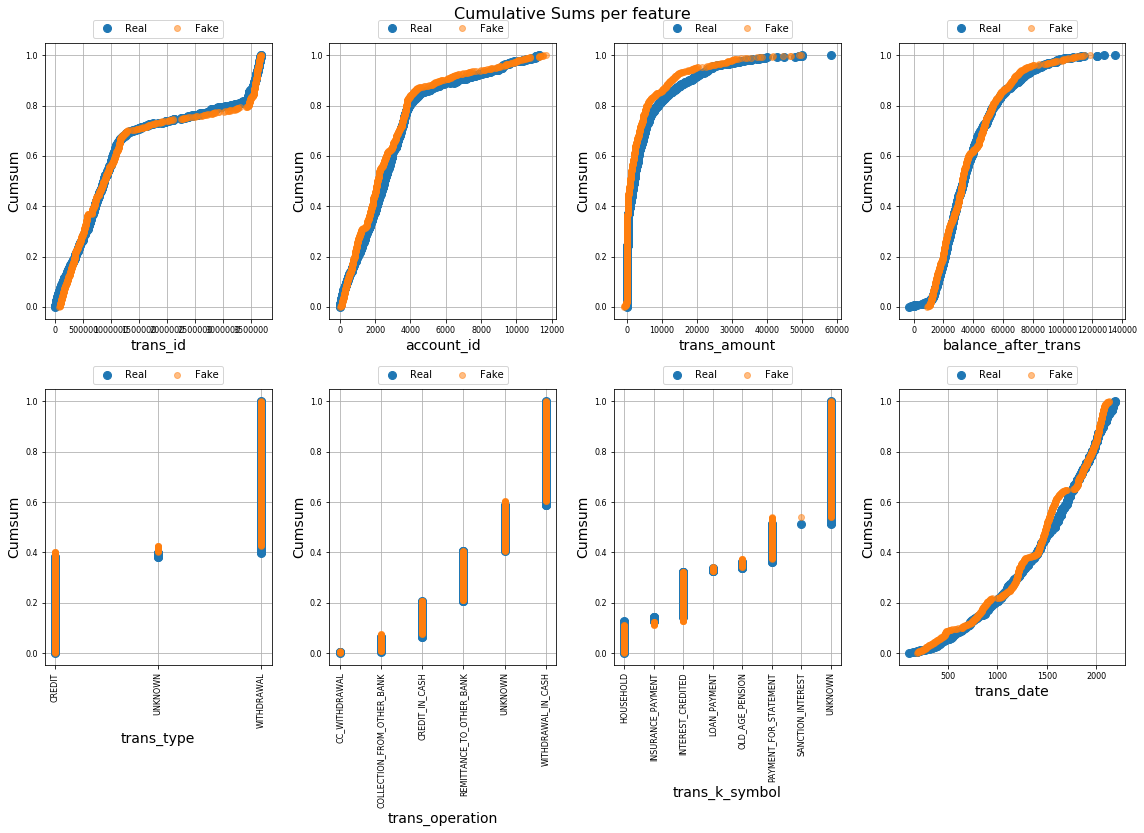

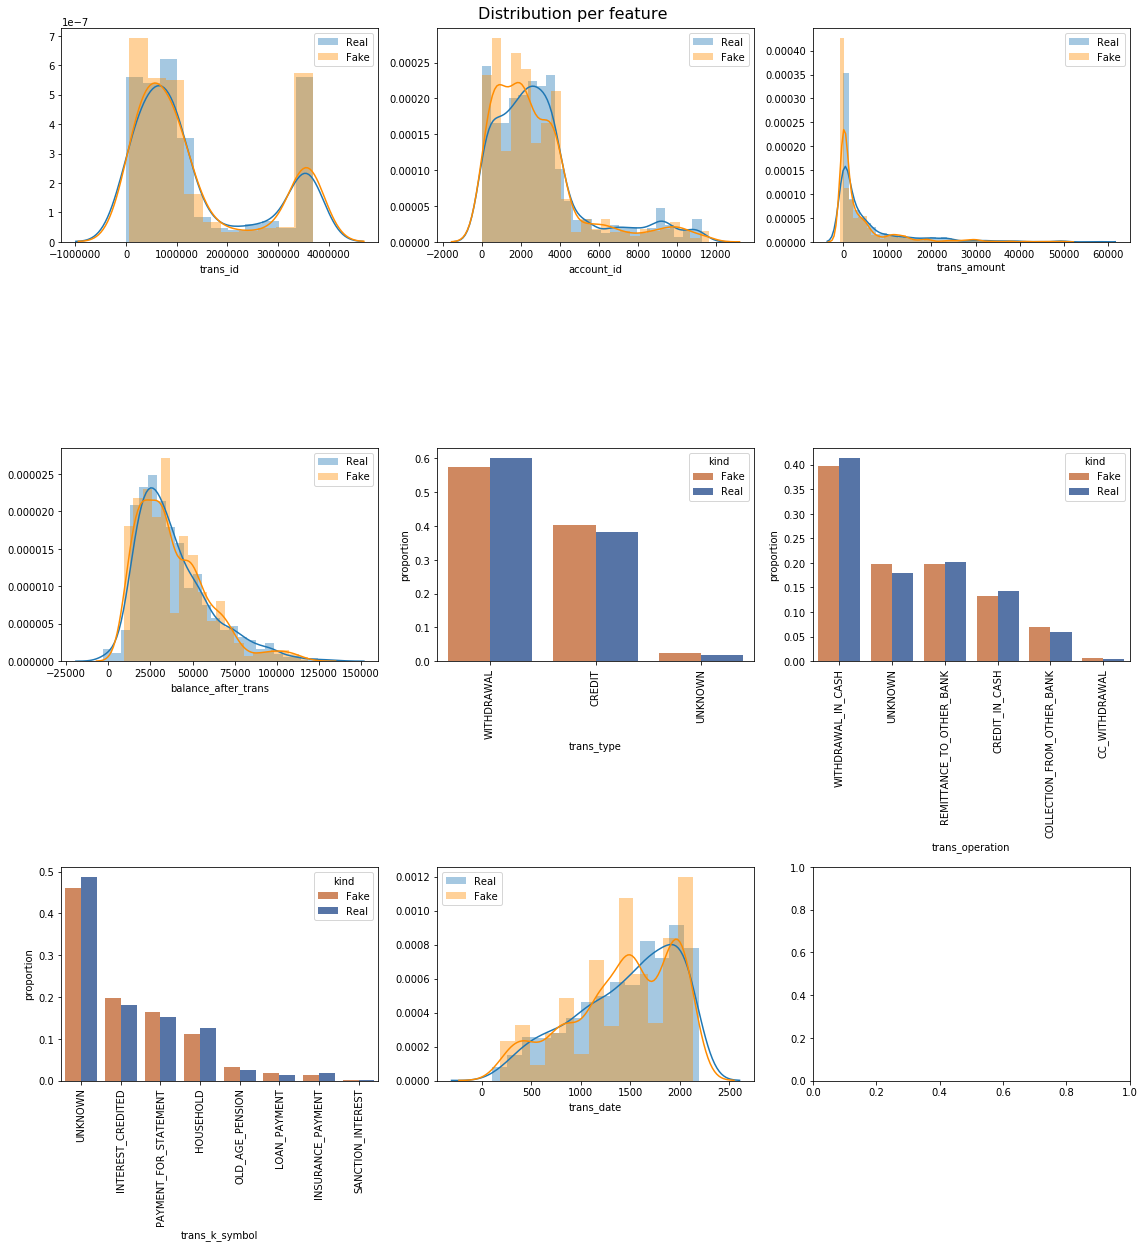

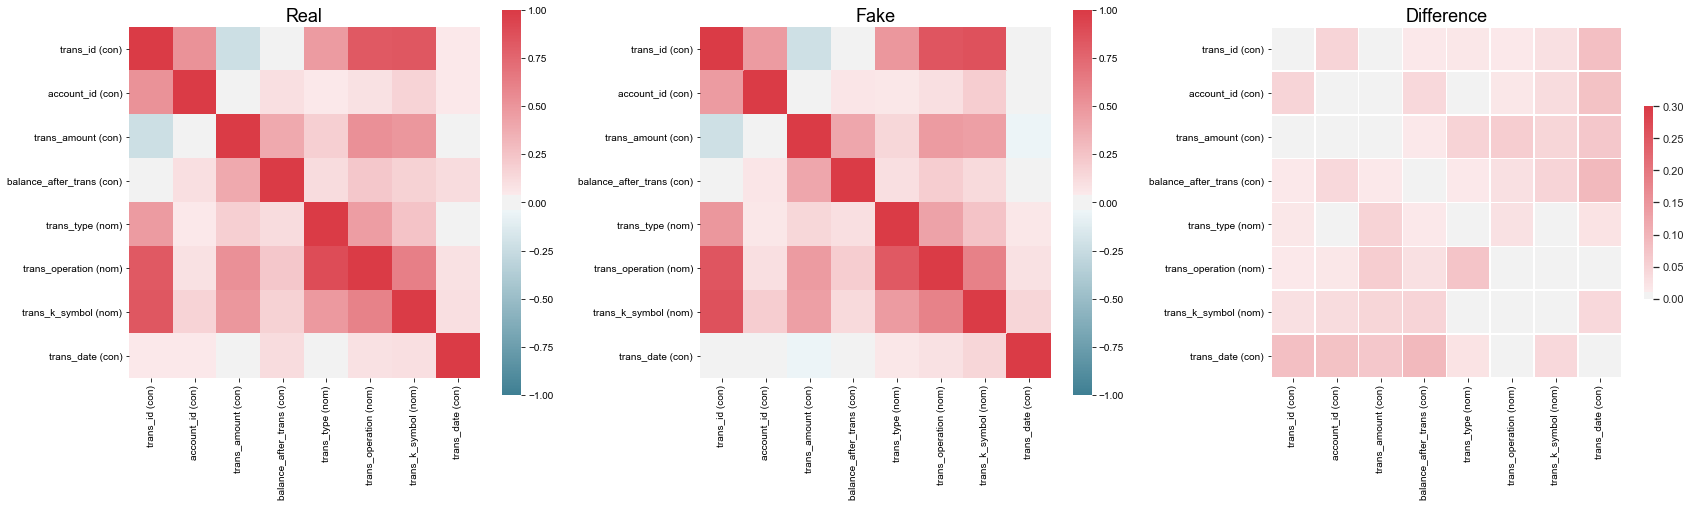

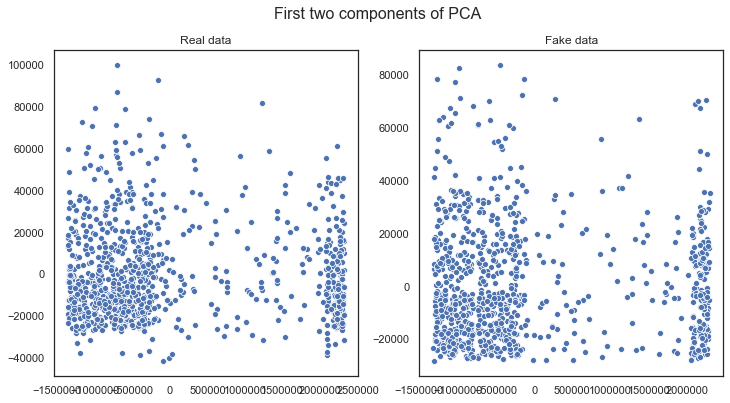

In [9]:
evaluator.visual_evaluation()